# DataSet Analysis

Before algorithms were invented, decisions in recuitment, advertisement, lending and criminal injustice were made by humans and organisations which are usually governed by the federal, state and local laws. These helped in balancing the process of desision making based on fairness, equity and transparency. However, in recent times, decisions are now being influenced by algorithms. Algorithms are finite sequence of precise instructions that are executed on the computer to perform a task. These algorithms utilizes and makes use of large volumes of available data. Due to the avalability of bulky datasets, it is now quite easy to gain and extract new insights into information around world through computers. Algorithms have been developed over the years to make them sophisticated and great tools for automated decision making. This has attracted private and public sectors as they are now incresingly making use of various Artificial intelligence systems and machine learning algorithms for automation of simple processes and making complex decisions. This emerging technology is also being incorporated into other sectors such as economic, financial, transportation, energy, entertainment sector etc. Businesses and Individuals are also being affected in a range from reccomendation systems to creditworthiness determination for banks.


We make use of the Financial Inclusion in Africa dataset in order to gain insight into the demographic factors that can drive out an individual's financial income. It contains the demographic information of 23,534 individuals among East Africa and the goal is to predict whether or not the individual has a bank or not. This prediction plays an important role in the long-term growth of the economy. source: https://zindi.africa/competitions/financial-inclusion-in-africa/data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/home/students/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/students/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
train= pd.read_csv('Train_v2.csv')

In [3]:
def age_cat(age):
    if age >= 15 and age <=65:
        return "15-65"
    else:
        return "above 65"
train['age_cat'] = train['age_of_respondent'].apply(age_cat)

## Variable Description

Variable description
we have the information of the variables in the table below. The first task we need to perform is a variable exploration. This set has 23524 instances and 13 features. Each individual is described by 10 important attributes. These attributes contain demographic Information, Family Information and Socioeconomic Information. 
The demographic Information consists of the age, gender, Country and Location types, Marital Status.
The Family Information consists of Relationship with head and Household size.
The Socieconomic Information consists of Cellphone Access, Job type and Eduational level.

## Data Exploration

First, We observe that the dataset is imbalanced; for example, 37% of the data was collected from Rwanda, while 28% from Tanzania, 26% from Kenya and only 9% from Uganda. We also observe that 59% of the sample are Females while 41% are Males. Each country's sample was obtained at different time; Rwanda in 2016, Tanzania in 2017, Kenya and Uganda in 2018. 

In [37]:
pd.DataFrame([train['age_of_respondent'].describe(),train['household_size'].describe() ])

,count,mean,std,min,25%,50%,75%,max
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0


/home/students/snap/jupyter/common/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


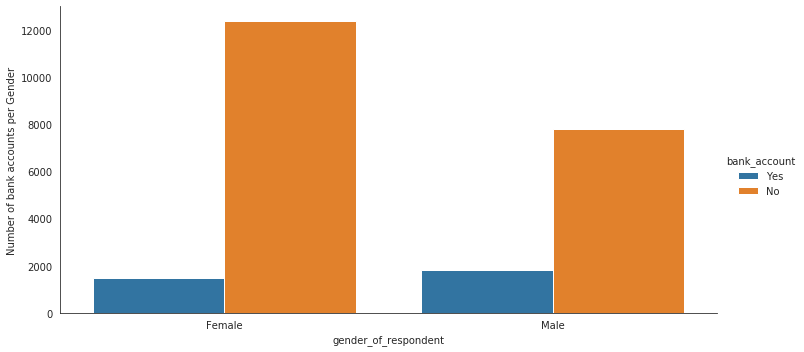

In [40]:
with sns.axes_style('white'):
    g = sns.factorplot("gender_of_respondent", data=train, aspect=2.0, kind='count',
                       hue='bank_account')
    g.set_ylabels('Number of bank accounts per Gender')

We observe here that males are likely to have bank accounts compared to females and the reasons are due to fact that Women are believed to be affected by these constraints


### 1. Ownership of Mobile Phones

The figure below shows the probability of females with no cellphones access having a bank account is close to zero

/home/students/snap/jupyter/common/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


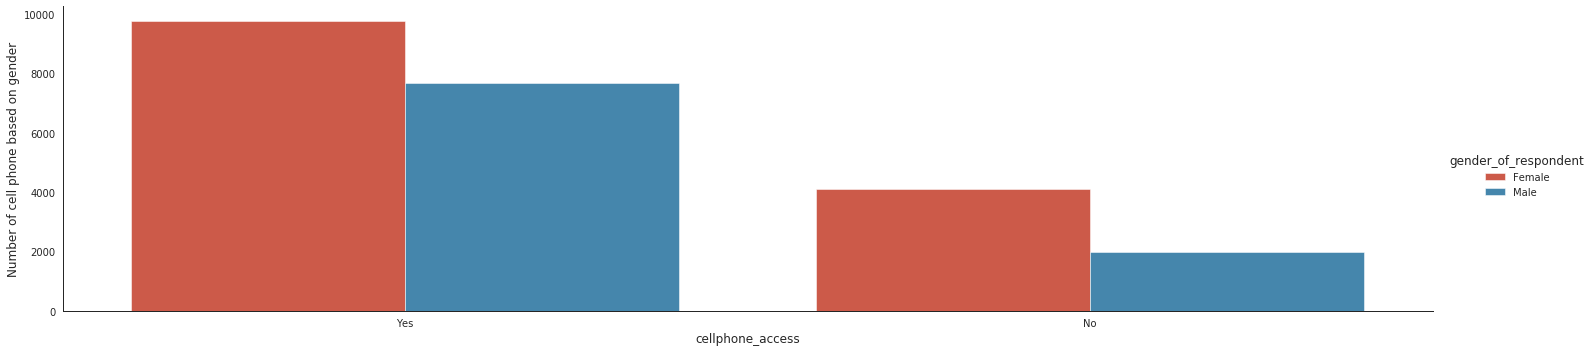

In [5]:
with sns.axes_style('white'):
    g = sns.factorplot("cellphone_access", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

In [10]:
train.loc[train['bank_account']=='Yes', 'bank_account'] = 1
train.loc[train['bank_account']=='No', 'bank_account'] = 0

In [11]:
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_cat
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,15-65
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,above 65
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,15-65
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,15-65
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,15-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,15-65
23520,Uganda,2018,uniqueid_2114,0,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,15-65
23521,Uganda,2018,uniqueid_2115,0,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,15-65
23522,Uganda,2018,uniqueid_2116,0,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,15-65


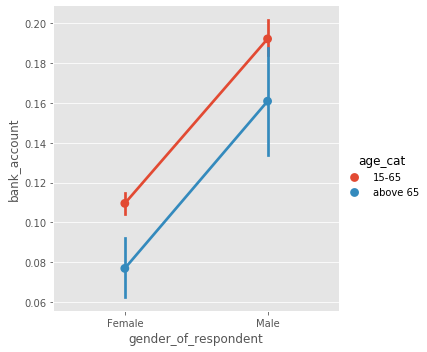

In [13]:
sns.catplot(x="gender_of_respondent", y="bank_account", hue="age_cat",kind="point", data=train)

### 2. Low level of Education compared to men

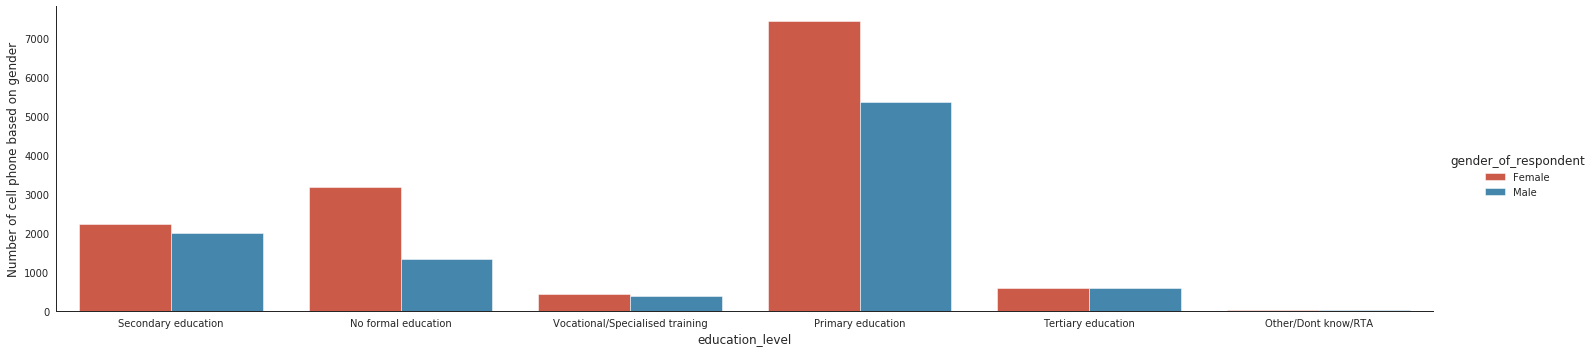

In [7]:
with sns.axes_style('white'):
    g = sns.factorplot("education_level", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

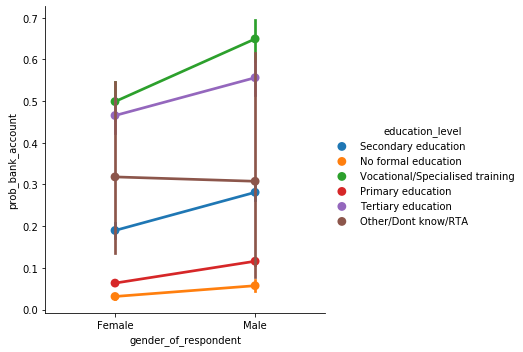

In [52]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="education_level", kind="point", data=train)

### 3. Poor infrastructure to reach women especially in rural areas

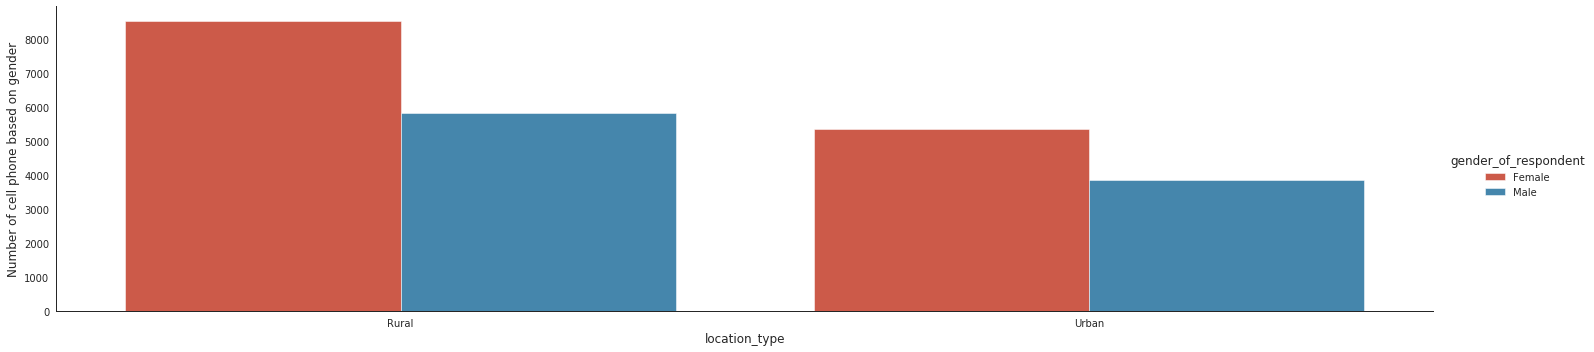

In [8]:
with sns.axes_style('white'):
    g = sns.factorplot("location_type", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

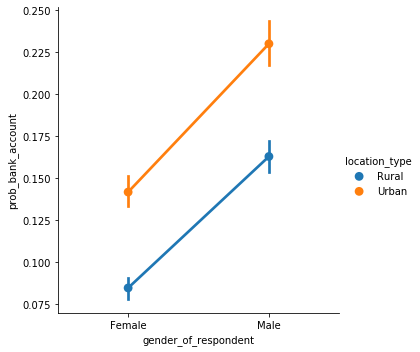

In [53]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="location_type", kind="point", data=train)

### 4. Women are highly likely to operate in informal sector with low income

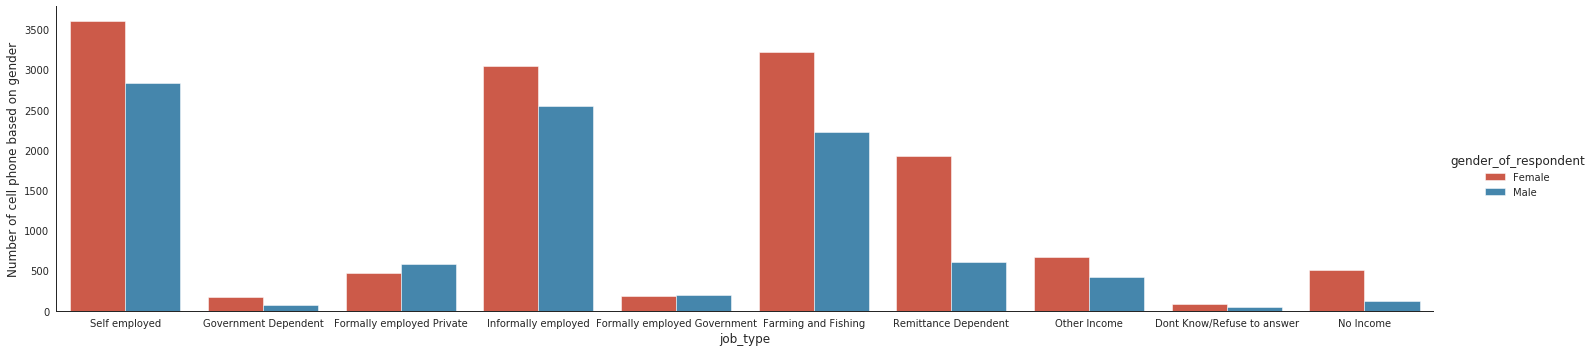

In [9]:
with sns.axes_style('white'):
    g = sns.factorplot("job_type", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

We notice a huge differnce in Government dependent Women and men. Government dependent men are more likely to have bank accounts compared to women.

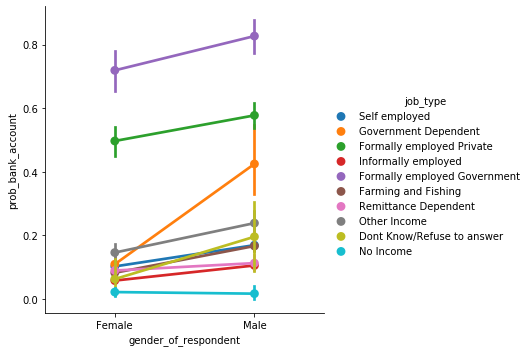

In [55]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="job_type", kind="point", data=train)

### 4. Women avoid services that do not meet their household needs

This shows that Men who head their (small) household are more likely to have a bank account compared to women who head their (large)household 

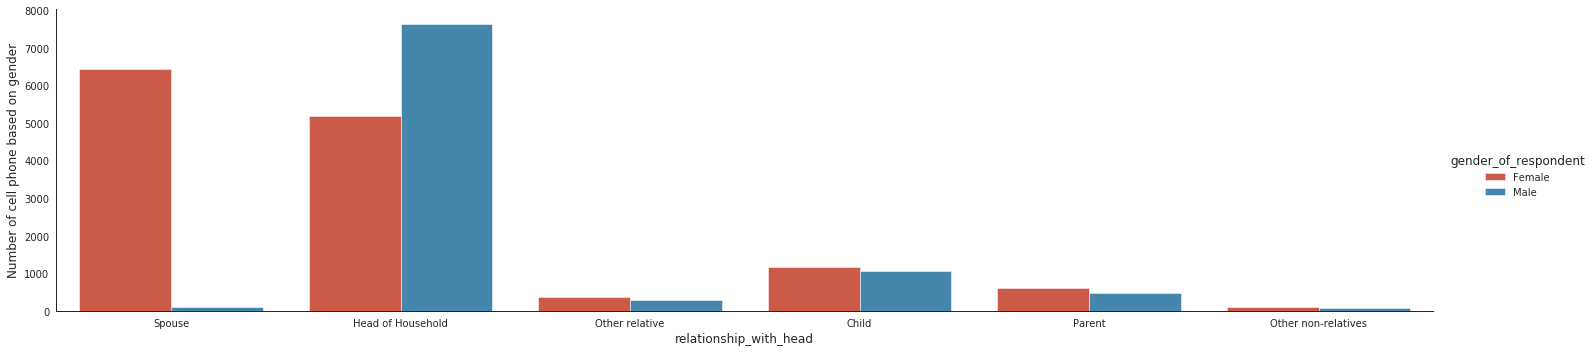

In [10]:
with sns.axes_style('white'):
    g = sns.factorplot("relationship_with_head", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

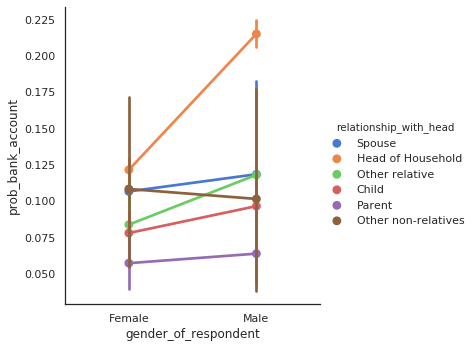

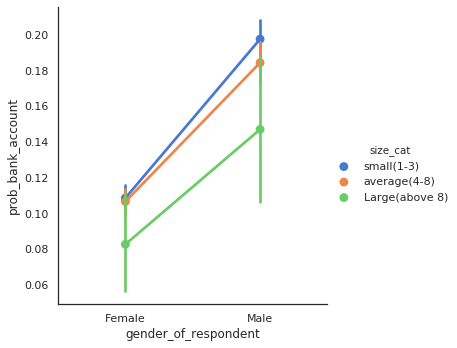

In [65]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="relationship_with_head", kind="point", data=train)
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="size_cat", kind="point", data=train)

### 5. Women are less interested in financial services with time compared to men

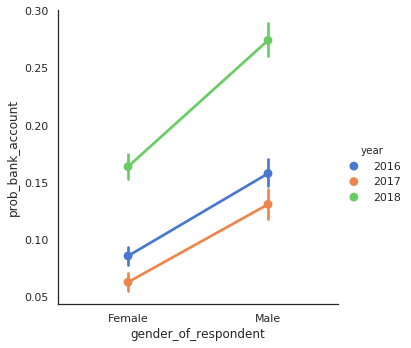

In [66]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="year", kind="point", data=train)

### Men who do not know their marital status are more likely to have a bank account

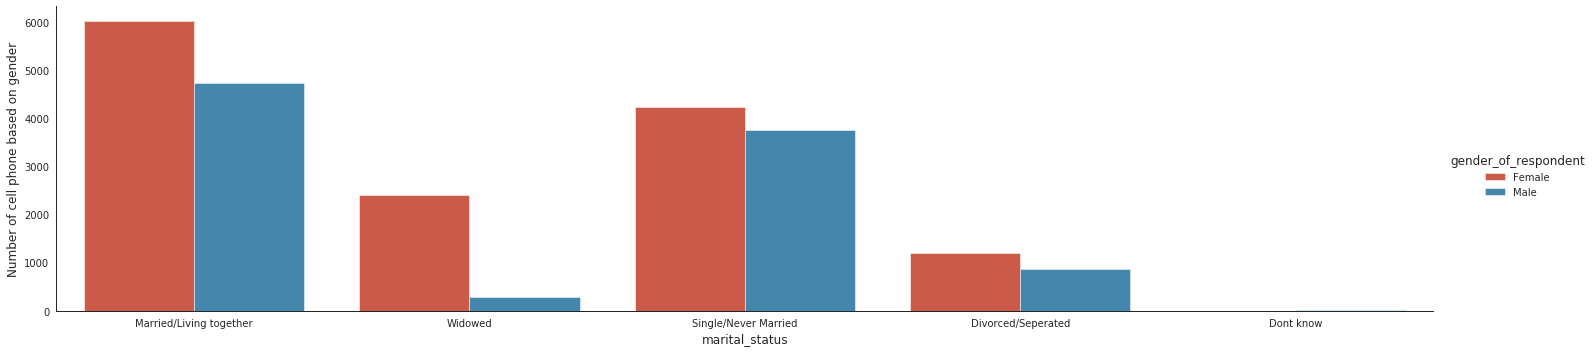

In [11]:
with sns.axes_style('white'):
    g = sns.factorplot("marital_status", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

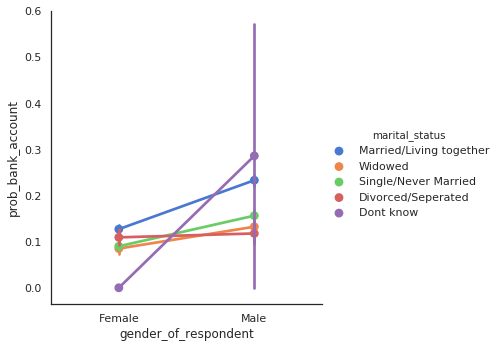

In [68]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="marital_status", kind="point", data=train)

### Women from Tanzania are not involved in financial services as opposed to Kenya men

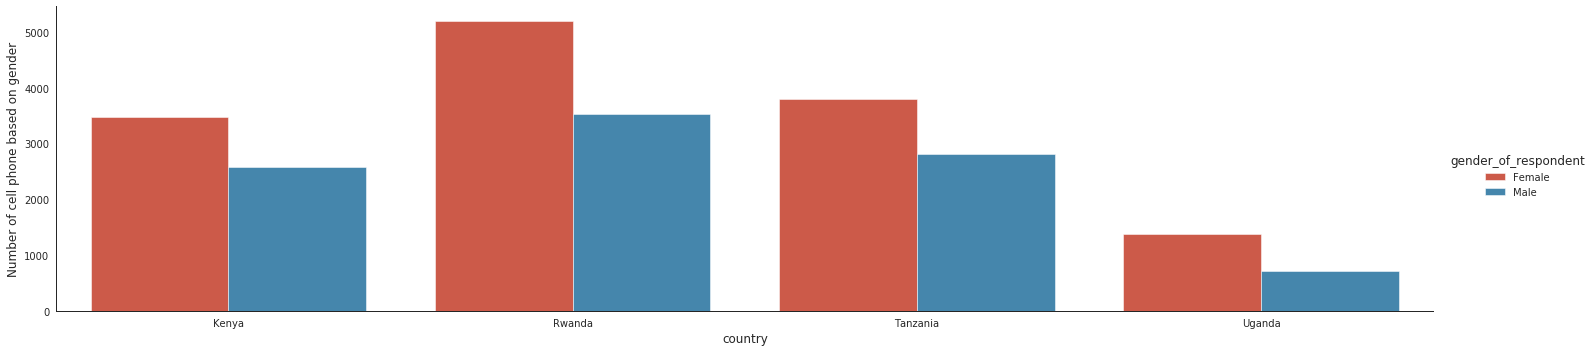

In [12]:
with sns.axes_style('white'):
    g = sns.factorplot("country", data=train, aspect=4.0, kind='count',
                       hue='gender_of_respondent')
    g.set_ylabels('Number of cell phone based on gender')

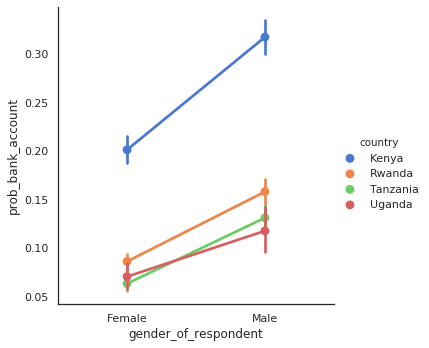

In [69]:
sns.catplot(x="gender_of_respondent", y="prob_bank_account", hue="country", kind="point", data=train)

### Statistical approach to measuring Bias

This dataset is set $ X $ and there is a known subset $A \subset X $ that is a 'protected' subset of the population. We have our distribution $D(X, Y, A)$ over $X$. $X$ are the set of attributes of all individual and $x \subset X$ is the set of attribute for each individual. Suppose we have a random classifier $h:x \rightarrow \{0,1\}$ giving labels to $X$. And individual $x$ with $h(x) = 1$ indicates that the person has a bank account and $h(x) = 0$ indicates that the person does not have a bank account.

For cases of gender and cellphone access, the domain of $A$ is binary, that is ${a,b} \in A$. But in cases of multiple attribute values for $A$, we transform the dataset into binary by replacing $n \in A$ \ $\{a\}$ with a new value $b$

Definition: [Bias in Labelled Dataset] the bias of h on A with respect to A and D is the difference between the probability that a random individual $a \in A $ drawn from $X$ is in the positive class and the probability that a random individual $ b \in A'$ is in the positive class.

The bais in 
$$ bias_{h}(X, A, D) :=  P[h(x)=1|x\in A'] - P[h(x)=1|x\in A] $$ 
$\Rightarrow$
$$ = \frac{ \{x \in X| x(A)=a, x(class) = + \}}{\{x \in X| x(A) = a\}} - \frac{ \{x \in X| x(A)=b, x(class) = + \}}{\{x \in X| x(A) = b\}}$$

### Measuring Bias on Dataset

In [39]:
SPList=[]
def Sbias(data, protected_column, protected_attribute, target):
# Creating a function that collects data, set of columns and attributs and the target
# Locating data where the protected class A is located 
    targetdata = data.loc[data[protected_column] == protected_attribute]
    total1= len(targetdata)
# Locating the positive class
    postarget = targetdata.loc[targetdata[target] == 'Yes']
    pos1 = len(postarget)
    prob1= pos1/total1
# Locating data where the protected class A is not located 
    elsedata = data.loc[data[protected_column] != protected_attribute]
    Other= str(elsedata[protected_column].unique())
    total2= len(elsedata)
    poselse = elsedata.loc[elsedata[target] == 'Yes']
    pos2 = len(poselse)
    prob2= pos2/total2
# Appending to a list
    new={'Feature':protected_column, 
         'Attribute': protected_attribute,
         'Probability of positive': prob1,
        'Others Probability of positive': prob2, 
        'Statistical Parity Difference': prob2 - prob1,
        'Disparate Impact ratio': prob2 / prob1}
    
    SPList.append(new)


In [40]:
trains = train.drop(['uniqueid', 'household_size', 'age_of_respondent','bank_account'], axis=1)

In [41]:
for j in trains.columns:
    for i in trains[j].unique():
        Sbias(train, j, i, 'bank_account')

In [42]:
Bias =pd.DataFrame(SPList)

In [43]:
Bias

,Feature,Attribute,Probability of positive,Others Probability of positive,Statistical Parity Difference,Disparate Impact ratio
0,country,Kenya,0.250659,0.102601,-0.148058,0.409324
1,country,Rwanda,0.114825,0.156130,0.041304,1.359713
2,country,Tanzania,0.091692,0.160021,0.068329,1.745208
3,country,Uganda,0.086149,0.146151,0.060002,1.696486
4,year,2018,0.208349,0.104852,-0.103497,0.503252
5,year,2016,0.114825,0.156130,0.041304,1.359713
6,year,2017,0.091692,0.160021,0.068329,1.745208
7,location_type,Rural,0.116503,0.178739,0.062236,1.534201
8,location_type,Urban,0.178739,0.116503,-0.062236,0.651805
9,cellphone_access,Yes,0.183797,0.017133,-0.166664,0.093219


In [48]:
Biass= Bias.set_index('Attribute')

In [49]:
L= Biass.loc[Biass['Feature']== 'country']

Text(0.5, 1.0, 'Statistical Parity Difference for Country')

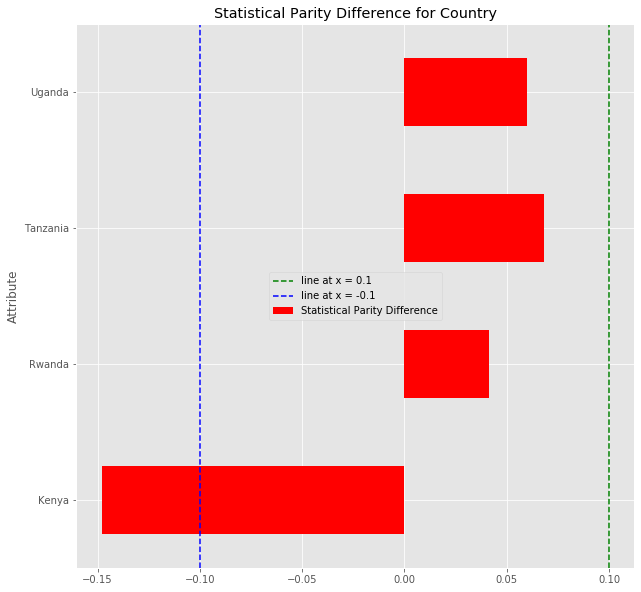

In [77]:
import matplotlib.pyplot as plt
L['Statistical Parity Difference'].plot(kind='barh', figsize=(10,10), color='r')
plt.axvline(x=0.1, color='g', linestyle='--',label='line at x = 0.1')
plt.axvline(x=-0.1, color='b', linestyle='--',label='line at x = -0.1')
plt.legend()
plt.title(label= 'Statistical Parity Difference for Country')

Text(0.5, 1.0, 'Disparate Impact ratio for Country')

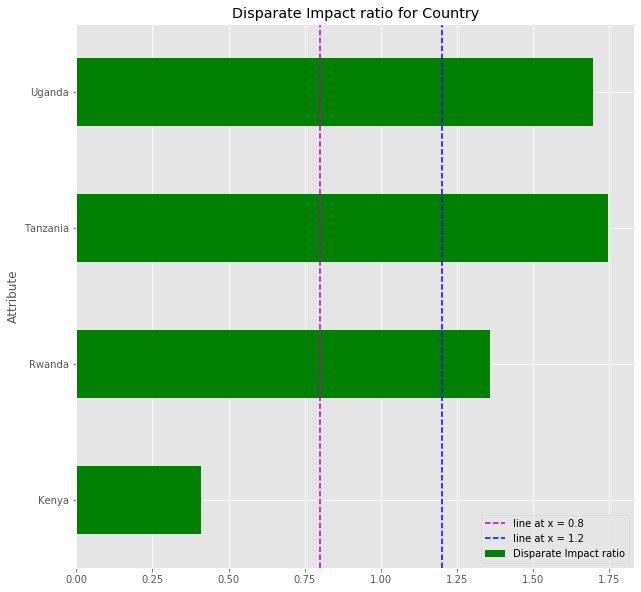

In [78]:
L['Disparate Impact ratio'].plot(kind='barh', figsize=(10,10), color='g')
plt.axvline(x=0.8, color='m', linestyle='--',label='line at x = 0.8')
plt.axvline(x=1.2, color='b', linestyle='--',label='line at x = 1.2')
plt.legend()
plt.title(label= 'Disparate Impact ratio for Country')

In [58]:
A= Biass.loc[Biass['Feature']== 'age_cat']

Text(0.5, 1.0, 'Statistical Parity Difference for Age')

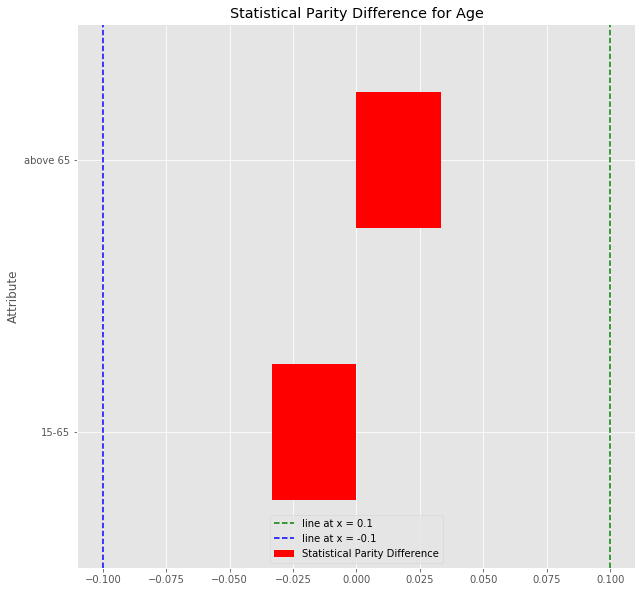

In [83]:
A['Statistical Parity Difference'].plot(kind='barh', figsize=(10,10),color='r')
plt.axvline(x=0.1, color='g', linestyle='--',label='line at x = 0.1')
plt.axvline(x=-0.1, color='b', linestyle='--',label='line at x = -0.1')
plt.legend()
plt.title(label= 'Statistical Parity Difference for Age')

Text(0.5, 1.0, 'Disparate Impact ratio for Age')

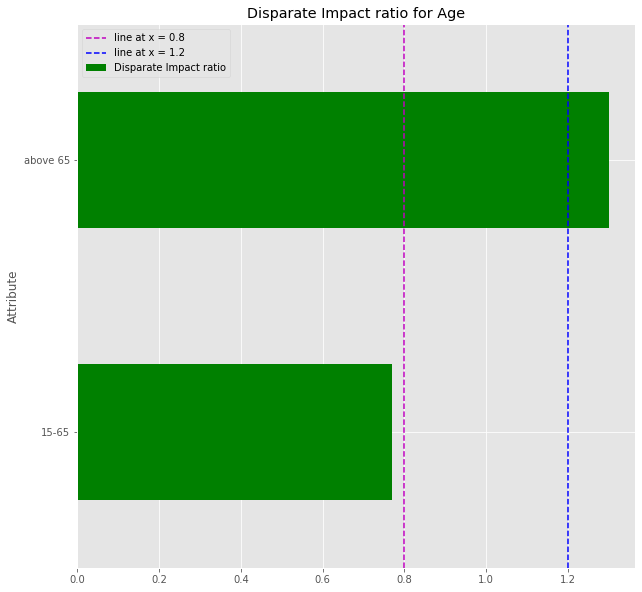

In [84]:
A['Disparate Impact ratio'].plot(kind='barh', figsize=(10,10),color='g')
plt.axvline(x=0.8, color='m', linestyle='--',label='line at x = 0.8')
plt.axvline(x=1.2, color='b', linestyle='--',label='line at x = 1.2')
plt.legend()
plt.title(label= 'Disparate Impact ratio for Age')

In [54]:
G= Biass.loc[Biass['Feature']== 'gender_of_respondent']

Text(0.5, 1.0, 'Statistical Parity Difference for Gender')

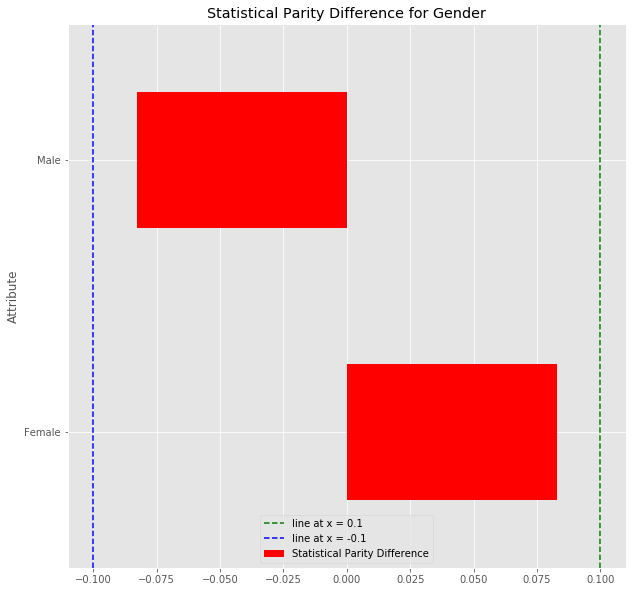

In [81]:
G['Statistical Parity Difference'].plot(kind='barh', figsize=(10,10),color='r')
plt.axvline(x=0.1, color='g', linestyle='--',label='line at x = 0.1')
plt.axvline(x=-0.1, color='b', linestyle='--',label='line at x = -0.1')
plt.legend()
plt.title(label= 'Statistical Parity Difference for Gender')

Text(0.5, 1.0, 'Disparate Impact ratio for Gender')

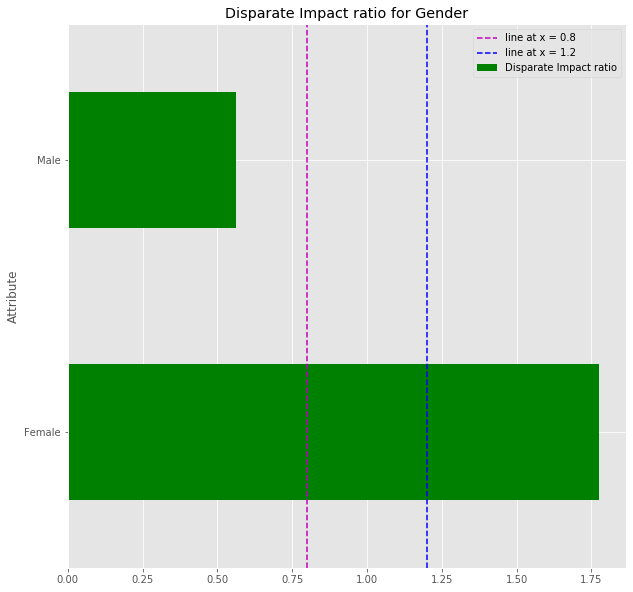

In [82]:
G['Disparate Impact ratio'].plot(kind='barh', figsize=(10,10),color='g')
plt.axvline(x=0.8, color='m', linestyle='--',label='line at x = 0.8')
plt.axvline(x=1.2, color='b', linestyle='--',label='line at x = 1.2')
plt.legend()
plt.title(label= 'Disparate Impact ratio for Gender')

This determines whether a datapoint $ x \in X $ is in the protected class. A positive bias value means that it is biased against the attribute while a negative bias means it is biased in favor of the attribute.

In [13]:
protectedclass = Bias.loc[Bias['Bias'] < -0.1]

In [14]:
for i,j in zip(protectedclass['Feature'], protectedclass['Attribute']):
    print('For', i, ',protected attributes is -->' ,j)

For country ,protected attributes is --> Kenya
For year ,protected attributes is --> 2018
For cellphone_access ,protected attributes is --> Yes
For marital_status ,protected attributes is --> Dont know
For education_level ,protected attributes is --> Secondary education
For education_level ,protected attributes is --> Vocational/Specialised training
For education_level ,protected attributes is --> Tertiary education
For education_level ,protected attributes is --> Other/Dont know/RTA
For job_type ,protected attributes is --> Formally employed Private
For job_type ,protected attributes is --> Formally employed Government


Futher test can be done to measure bias like one-sided null hypothesis , two sample t-test or two-proportion Z test.

What causes these bias towards some attributes are 
1. Sampling Bias: This arises due to the fact that the non-random sampling of subgroups from the data was collected from a particular population around a period of time (2016- 2018), the trends estimated may not generalise well for a new population.[A survey of Biased and fairness in machine learning]

2. Population Bias: This arises when statistics, demographics, representatives, and characteristics are different in the user population represented in the dataset or platform from the original target population [Alexandra Olteanu et al, 2016]. In the data set, it shows in each country sample higher number of female candidate as compared to male but this does not represent the population currently. According to countrymeters.info, due to external migration, the ratio of male to female has  increased to 1016 males to 1000 females. Hence, The ratio af male to female in these countries are presently equal. Rwanda has 49.1: 50.9, Uganda has 50:50, Tanzania has 50: 50, Kenya has 49.9: 50.1 (Male : Female).

4. Historical Bias. This is a bias that is existing and it affects data generation process even in cases of perfect sampling and feature selection [Harini Suresh and John V Guttag. 2019]. This exist in this data as it generalises that from a larger sample of women, men have larger amount of bank accounts. This will cause the result to be biased towards men.

5. Representation Bias. Representation bias happens from the way we define and sample from a population. For example, the representation of the countries Rwanda, Kenya, Tanzania and Uganda can be poorly represented based on the samples. It is biased towards Kenyans have more chances of being classified as having bank accounts.

6. Simpson’s Paradox: This data has ten different subgroups with different characteristics and behaviors
According to Simpson’s paradox, a trend, association, or characteristic observed in underlying subgroups may be quite different from association or characteristic observed when these subgroups are aggregated.[Emily M. Bender and Batya Friedman. 2018]



The three methods used to mitigate bias are;
1. Pre-Processing: This involves changing the statistical properties of the original data so that it produces fair prediction. The steps are input data, detect the bias, mitigate the bias then we train models for comparison. 
2. In-Processing: This involves changing the behavior of the algorithm so that it produces fair prediction. The steps are input data, detect the bias, then we mitigate the bias and train models for comparison. 
3. Post-Processing: This involves changing the output of the algorithm so that it produces fair prediction. The steps are input data, detect the bias, then we train models and mitigate the bias. 